# Graph Based Segmentation
---

## Image as Graph
* Vertex = pixel
* Edge = between each pair of pixels
* Graph Notation: G = (V, E) 
* Edge weight = affinity(관계) or similarity between two vertices

---

# Visibility Graph
현재 SFM 관련 파이썬 파일 작성하는데, 위 주제 관련해서 어려움이 있음으로 내용을 정리한다.

---
## From time series to complex networks: The visibility graph
저자: Lucas Lacasa* † , Bartolo Luque*, Fernando Ballesteros ‡ , Jordi Luque § , and Juan Carlos Nuño

>In this work we present a simple and fast computational method,
the visibility algorithm, **that converts a time series into a graph.** The
constructed graph inherits several properties of the series in its
structure. Thereby, **periodic series convert into regular graphs, and
random series do so into random graphs.** Moreover, fractal series
convert into scale-free networks, enhancing the fact that power
law degree distributions are related to fractality, something highly
discussed recently. **Some remarkable examples and analytical tools
are outlined to test the method’s reliability.** Many different mea-
sures, recently developed in the complex network theory, could by
means of this new approach characterize time series from a new
point of view.

**요약**
1. time series를 graph로 표현한 것이다. 
2. 구조적 특징을 상속받는다.
    - 주기적 구조는 주기적 graph로
    - random 구조는 random graph로
    - fractal series는 scale-free network로
3. 본인들이 이러한 것들을 분석하는 좋은 툴들을 소개하겠다.

---
## Image-Based Localization Aided Indoor Pedstrian Trajectory Estimation Using Smartphones
저자: Yan Zhou 1 , Xianwei Zheng 1,2, *, Ruizhi Chen 1, *, Hanjiang Xiong 1,2 and Sheng Guo 1
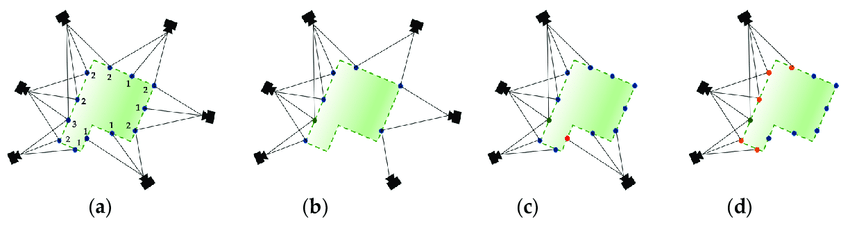
그림을 보면 이해가 되듯이, 빨간 점은 두 카메라에서 동시에 볼 수 있는 내용이다.

SFM은 여러대의 카메라를 사용하면서 시간에 관계없이 사용된다. 하지만 SLAM은 한 대의 카메라로 시간에 관계있이 iamge point와 카메라간 그래프 관계를 만든다.

기존의 내가 알고 있는 내용과 상관없긴 한데, RANSAC을 거부하는 듯한 모습이다. RANSAC을 사용하면 algorithm의 길이가 길어지기 때문! 해서 다른 알고리즘을 사용하고 싶다고 한다. 해서 사용하려는게 3D-to-2D matching 알고리즘 이다. 근데 이것도 조사해보니 별로란다. 왜냐면 big-O 가 결과적으로 차이가 안나기 때문. 아래는 더 효율 좋게 하기 위해 사용하는 알고리즘이란다.

> We therefore apply a visibility filter to the SFM model and preserve a set of points that are visible in more than N images as simplified model. The correspondence search is then performed between the query image and the simplified model until N matches are found. **N controls the balance between run-time efficienct and localization effectiveness** ~ 

* Search algorithm can be formulated as follows
> 1. We determine the subset P that contains all the potential points that survive in the visibility filter
  2. Search 2D features against the 3D points --> At least N points
  3. If algorithm fins N matches, then the set M links the 2D features in the query image directly to the 3D points in the model
  4. These matches are fed into the pose estimation routine

---


## 정리
co-visibility는 bipartite visibiility graph로 나타낼 수 있다. 각 3d points는 point로, 카메라는 노드이다. 엣지는 point와 노드를 잇는다.


* Vertex = 3d points, cameras
* Edge = points - cameras
* Edge Weight = 1 or 0 : 보이는지 유무만

그렇다면 이 co-visibility filter를 이용해서 어떤 것을 이룰 수 있을까? 
우리는 BA를 하기 위해서 모든 2d - 3d proj을 하게 되는데, 그렇다면 3d points의 정확한 개수를 알 필요가 있는가? 겹친다고 생각되는 놈들만 사용해도 되는거 아닌가?

0 - 1: 1400
0 - 2: 300
1 - 2: 1300
1 - 3: 300
2 - 3: 1500
2 - 4: 100
3 - 4: 1500

위와 같이 co visibility를 표현한 graph가 있다고 하자. 그렇다면 3d points는 최소 몇개 필요한가...? 정확히 몇개가 아니라 최소! 정답은 최소 다 같이 보인 점들의 개수만 있으면 된다. 그리고 계산도 그에 따라서만 하면 된다. --> 하지만 분명 겹치는 친구들이 나올 것이다. 즉 0 - 1 - 2 에서 다 보이는 친구들이 있을 텐데, 이러한 놈들은 어떻게 할 것인지? 

우리가 갖고 있는 또다른 정보는 descriptor이다. descriptor를 사용해서 점간 유사도를 파악하였는데, 이것을 정확한 3d point개수 파악에 활용할 수 있을까? 

## 상황
### Known
- 2d point 개수 알고 있음.
- 이미지 간 matching 되는 descriptor를 갖고 있음.

### Unknown
- 3d point의 개수
- 3d point의 위치
- camera parmeter 

### 문제점
3d point의 개수를 어떻게 파악할 것인가?
일단 전체 합하는게 가장 쉽지. 그런데 그리하면 분명 겹치는 애들이 존재할 것이다. 애초부터 겹치는 애들을 지워보자는 의미. 

교수님 방식을 분석해보면,

1. 모든 match pair에다가
2. 각 match inlier마다
3. 카메라 index와 2d img로 Key를 만들고, Value가 3D point의 index인 놈을 만들었다. 

3d point의 index....일단 return 값을 보면 저게 왜 index라 하는지 모르겠다...



match descriptor query = i번째 카메라
match descriptor train = i+1 번째 카메라